# Assignment

In this assignment and the assignments of the following checkpoints, you work with the fashion MNIST dataset which is another image dataset that comprised of 70000 greyscale 28x28 images. The dataset contains 10 classes as follows:

 + T-shirt/top
 + Trouser/pants
 + Pullover shirt
 + Dress
 + Coat
 + Sandal
 + Shirt
 + Sneaker
 + Bag
 + Ankle boot

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap

import warnings 

warnings.filterwarnings('ignore')

import itertools

In [3]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

Select 10000 images randomly and work on this sample in the following exercises. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.
### 1. Load the dataset and make your preprocessing like normalizing the data.

In [5]:
np.random.seed(123)

indices = np.random.choice(70000, 10000)

X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


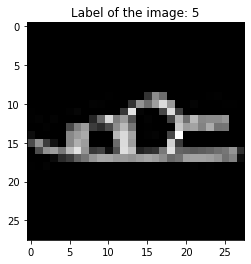

In [9]:
plt.imshow(X[1000].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[1000]))

plt.show()

### 2. Apply UMAP to the data.

In [13]:
umap_results = umap.UMAP(n_neighbors=5,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X)

### 3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [15]:
plt.figure(figsize=(10,5))

colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]

for i in range(umap_results.shape[0]):
    
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### 4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

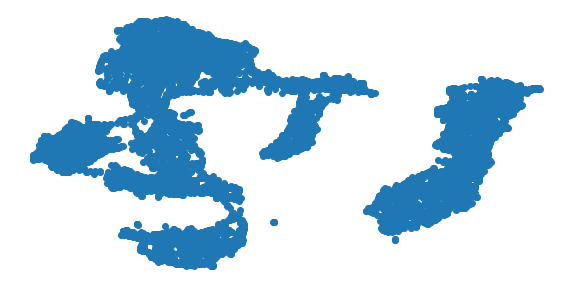

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can clearly identify six different grouping above. Other classes are intertwined. In this regard, UMAP did a better job than PCA and T-SNE.  

### 5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

In [ ]:
umap.UMAP

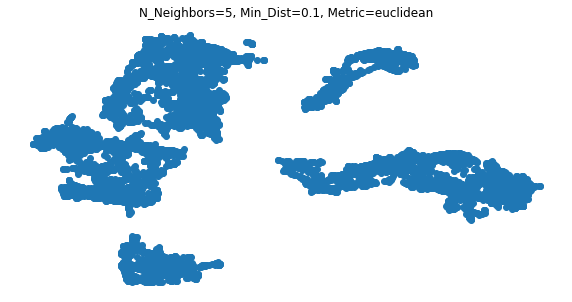

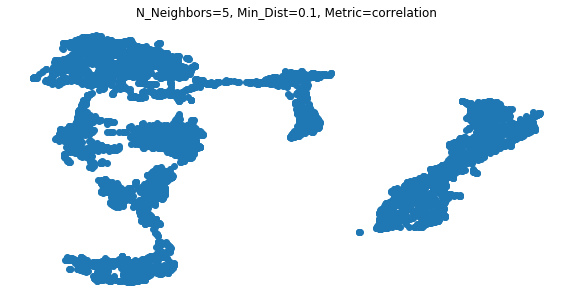

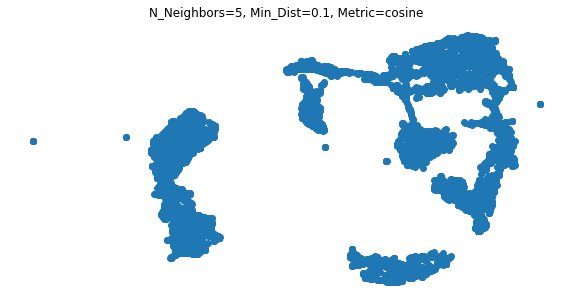

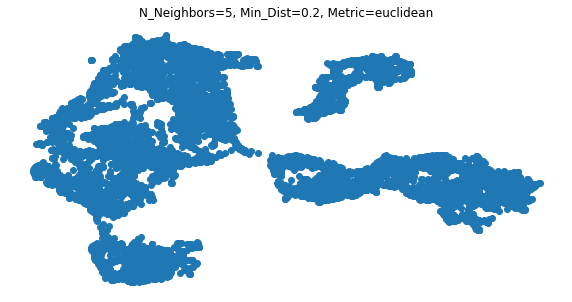

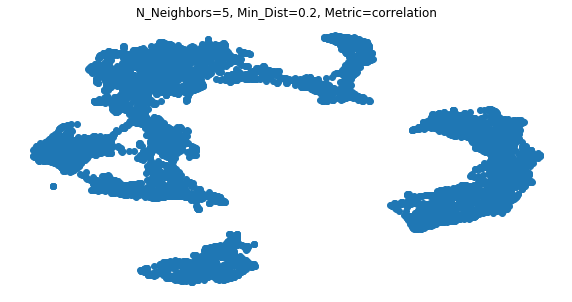

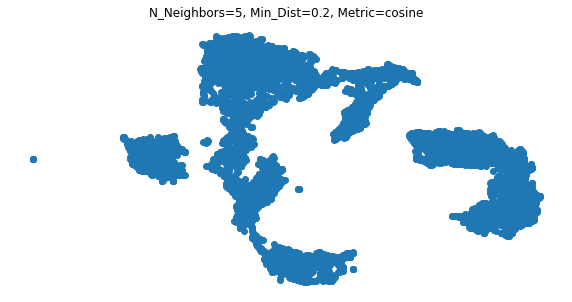

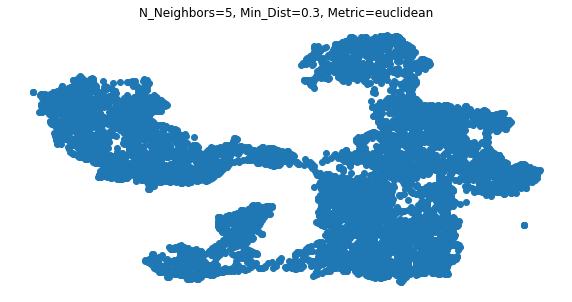

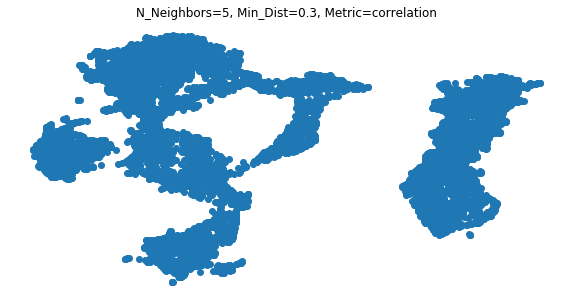

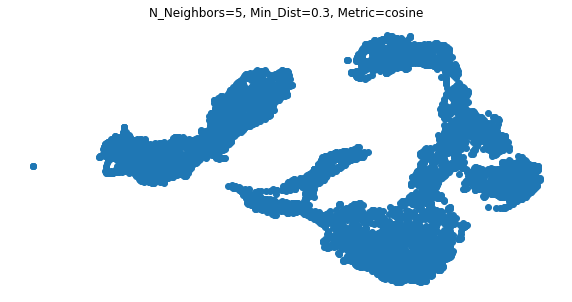

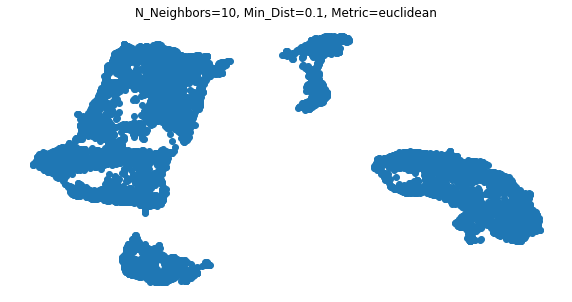

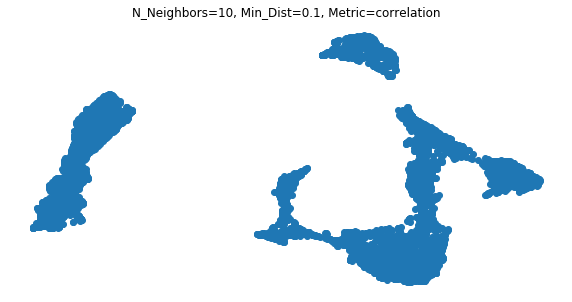

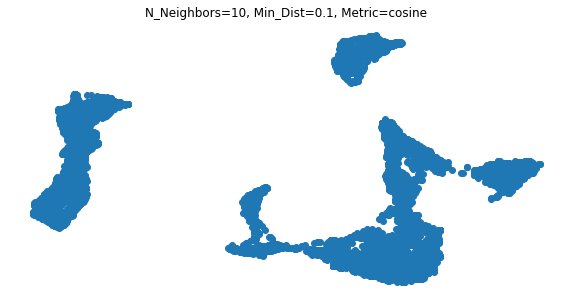

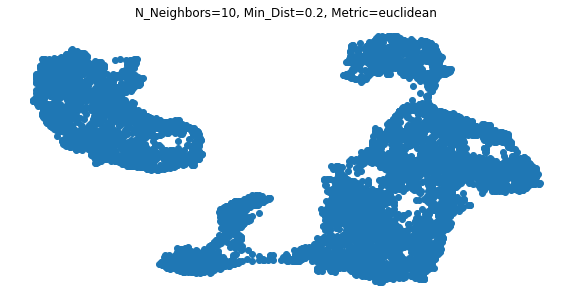

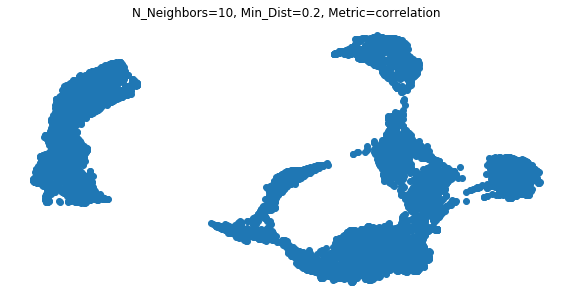

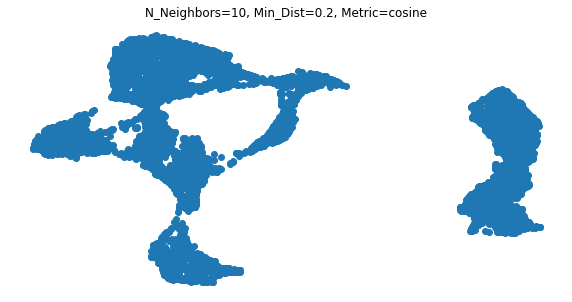

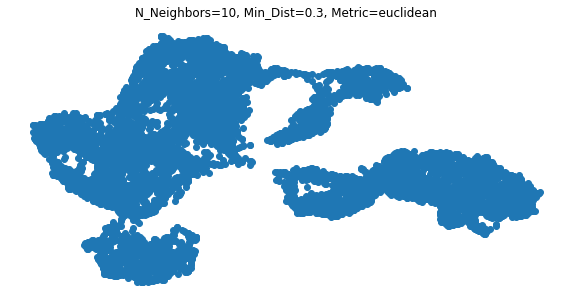

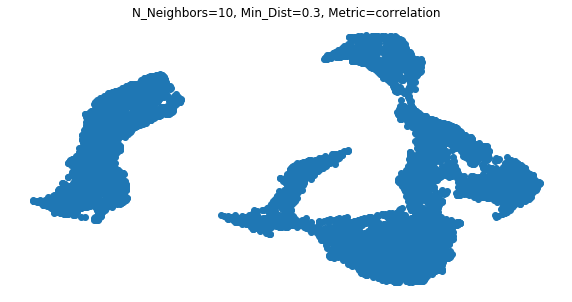

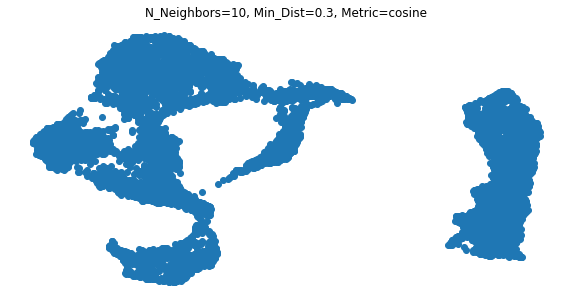

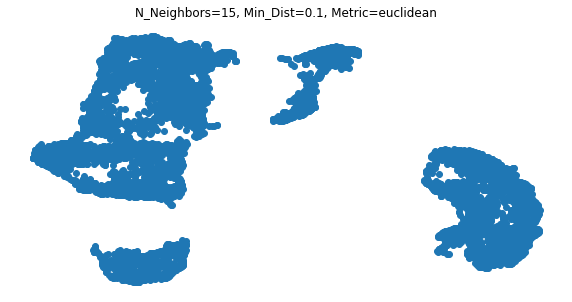

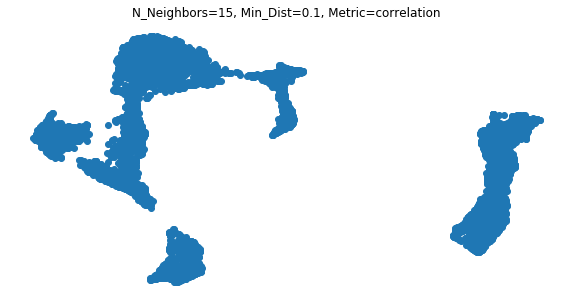

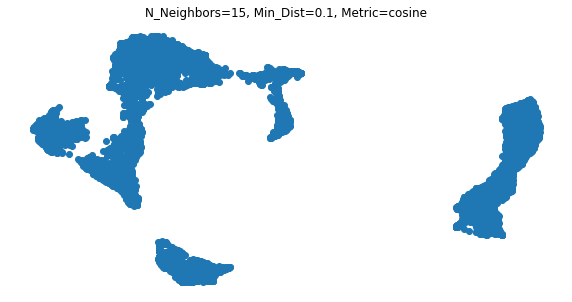

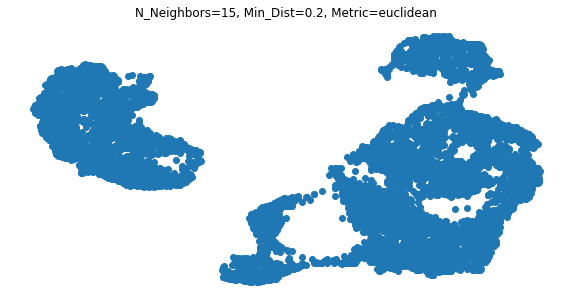

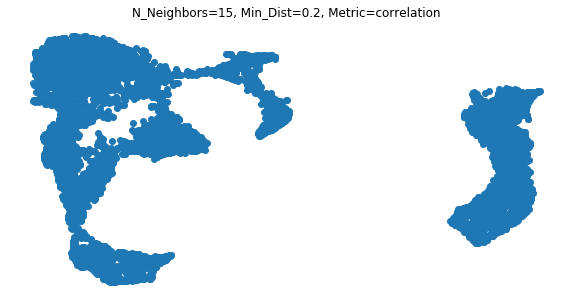

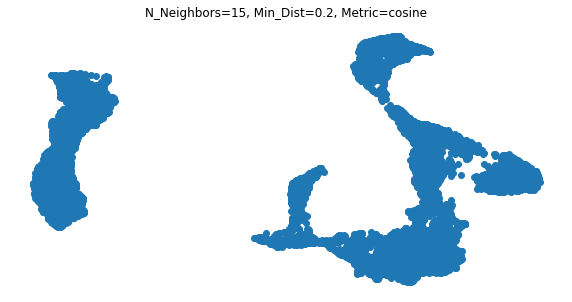

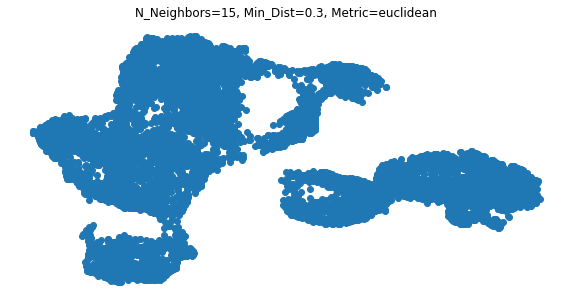

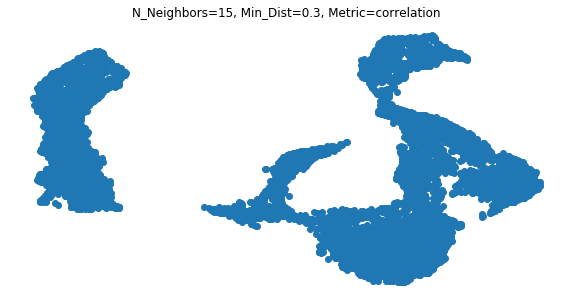

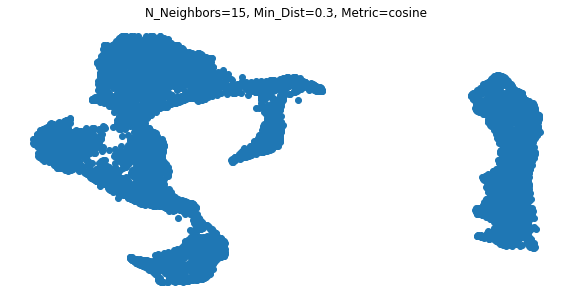

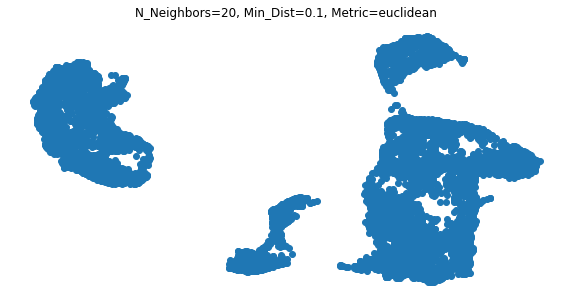

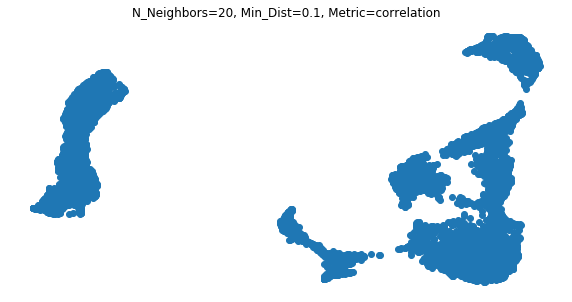

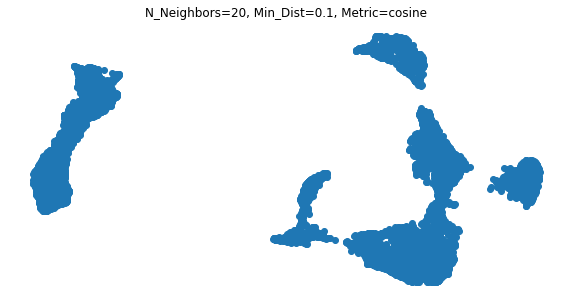

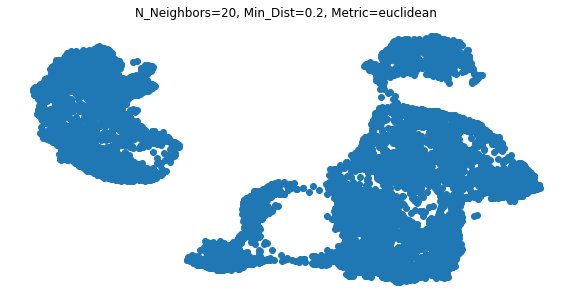

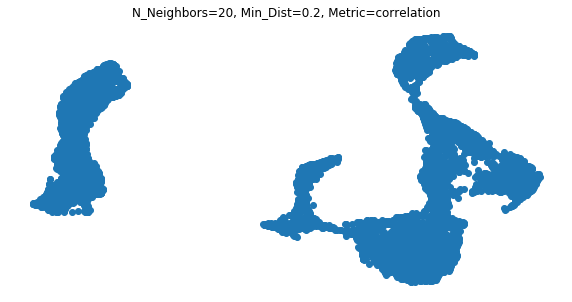

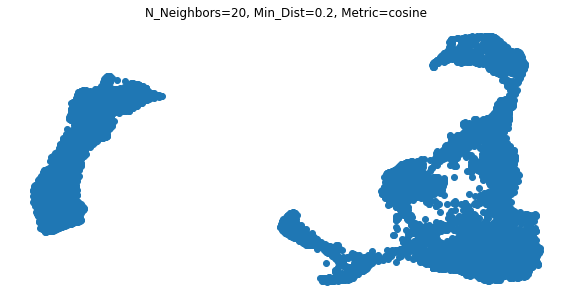

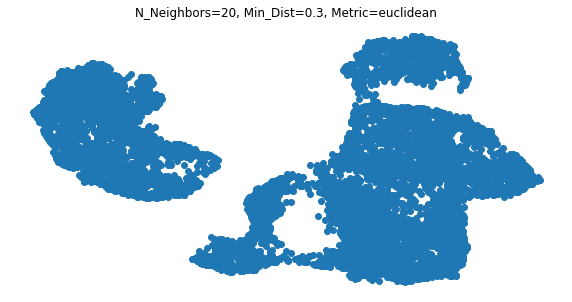

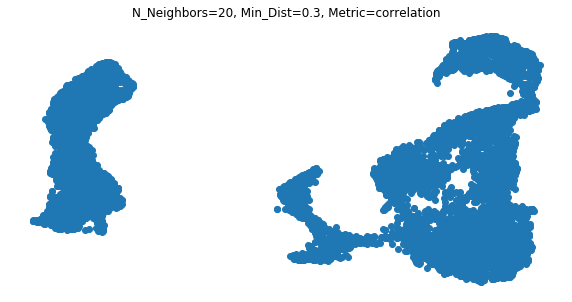

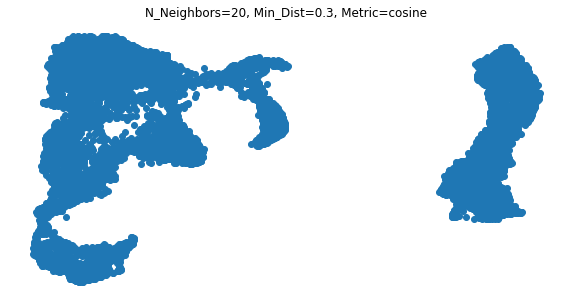

In [20]:
neighbors = range(5,21,5)
min_dist_values = [0.1, 0.2, 0.3]
metric_values = ['euclidean', 'correlation', 'cosine']


for neighbor, min_dist, metric in itertools.product(neighbors, min_dist_values, metric_values):
    
    umap_results = umap.UMAP(n_neighbors=neighbor,
                             min_dist=min_dist,
                             metric=metric).fit_transform(X)
    
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('N_Neighbors={}, Min_Dist={}, Metric={}'.format(neighbor, min_dist, metric))
    plt.show()

The best clarity is achieved by the combination of n_neighbors=5, min_dist=0.1 and metric='correlation'.